In [ ]:
import pandas as pd

data_loc = 'Province_data_2000_ned.xlsx'

df = pd.read_excel(data_loc, header=0)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

df.head()

PROVINCE  YEAR  CROP_OUTPUT  ANIMAL_OUTPUT  \
0  NL11 Groningen  2000       288.34         289.67   
1  NL11 Groningen  2001       277.80         331.81   
2  NL11 Groningen  2002       282.96         321.16   
3  NL11 Groningen  2003       290.15         315.81   
4  NL11 Groningen  2004       263.75         331.45   

   OUTPUT_OF_THE_AGRICULTURAL_INDUSTRY  SUBSIDIES_ON_AGRICULTURE  \
0                               626.90                     21.52   
1                               665.52                     22.93   
2                               670.93                     33.02   
3                               672.64                     32.24   
4                               662.96                     20.26   

   ENTREPRENEURIAL_INCOME  FACTOR_INCOME  POPULATION_DENSITY  \
0                  112.50         211.08               241.2   
1                  168.64         235.74               242.9   
2                  140.02         207.88               244.3   
3                  149.01         226.82               245.6   
4                  138.60         208.63               246.0   

   GDP_AT_CURRENT_PRICES  AGRICULTURAL_AREA  NETHERLANDS_AVERAGE_LAND_PRICE  \
0               17107.64                NaN                           35713   
1               18844.96                NaN                           37150   
2               19099.12                NaN                           40150   
3               19592.55                NaN                           34160   
4               20043.47                NaN                           31432   

   AGRICULTURAL_LAND_PRICE  
0              24999.00000  
1              26245.08081  
2              28623.93644  
3              24574.27405  
4              22814.91358

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   PROVINCE                             276 non-null    object 
 1   YEAR                                 276 non-null    int64  
 2   CROP_OUTPUT                          264 non-null    float64
 3   ANIMAL_OUTPUT                        264 non-null    float64
 4   OUTPUT_OF_THE_AGRICULTURAL_INDUSTRY  264 non-null    float64
 5   SUBSIDIES_ON_AGRICULTURE             264 non-null    float64
 6   ENTREPRENEURIAL_INCOME               264 non-null    float64
 7   FACTOR_INCOME                        264 non-null    float64
 8   POPULATION_DENSITY                   276 non-null    float64
 9   GDP_AT_CURRENT_PRICES                276 non-null    float64
 10  AGRICULTURAL_AREA                    72 non-null     float64
 11  NETHERLANDS_AVERAGE_LAND_PRICE  

In [ ]:
df.columns

Index(['PROVINCE', 'YEAR', 'CROP_OUTPUT', 'ANIMAL_OUTPUT',
       'OUTPUT_OF_THE_AGRICULTURAL_INDUSTRY', 'SUBSIDIES_ON_AGRICULTURE',
       'ENTREPRENEURIAL_INCOME', 'FACTOR_INCOME', 'POPULATION_DENSITY',
       'GDP_AT_CURRENT_PRICES', 'AGRICULTURAL_AREA',
       'NETHERLANDS_AVERAGE_LAND_PRICE', 'AGRICULTURAL_LAND_PRICE'],
      dtype='object')

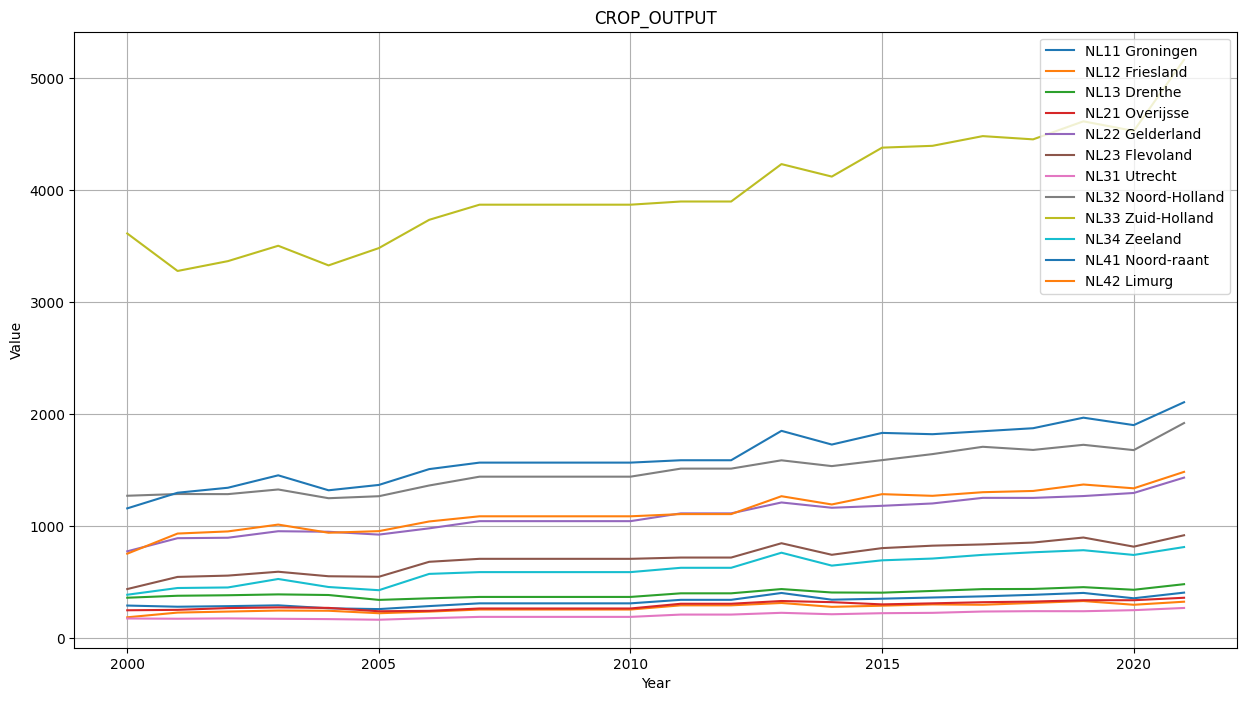

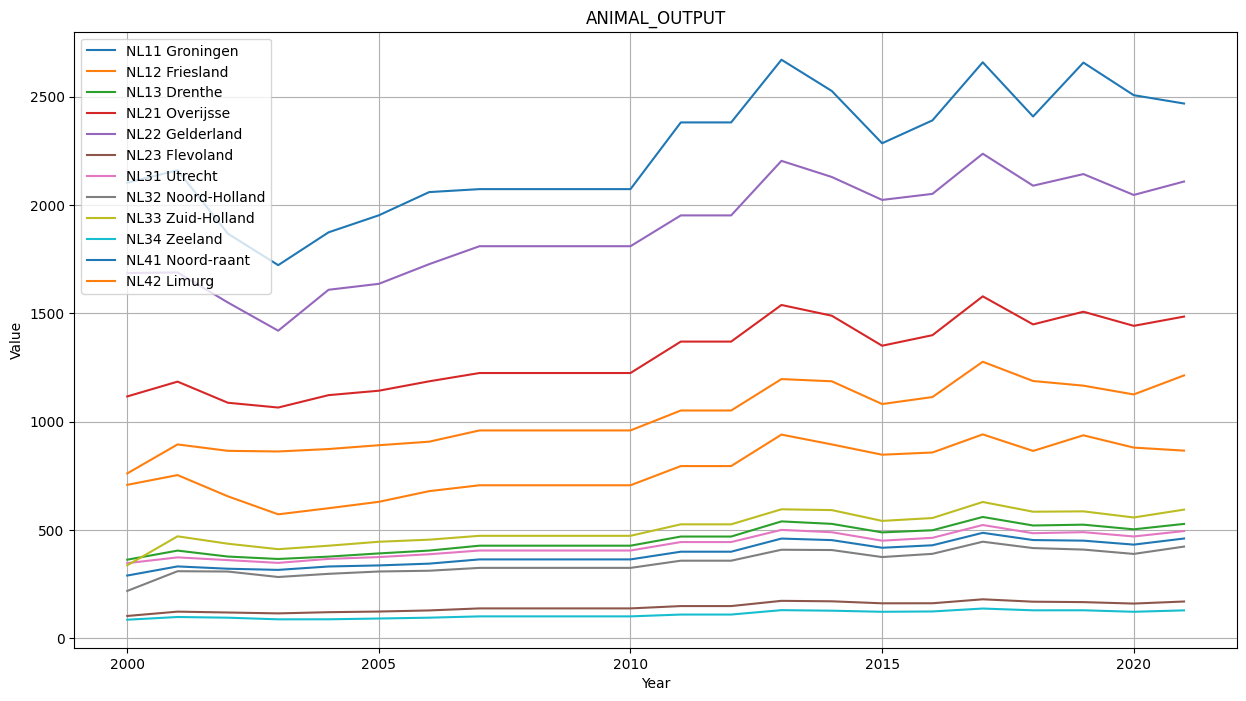

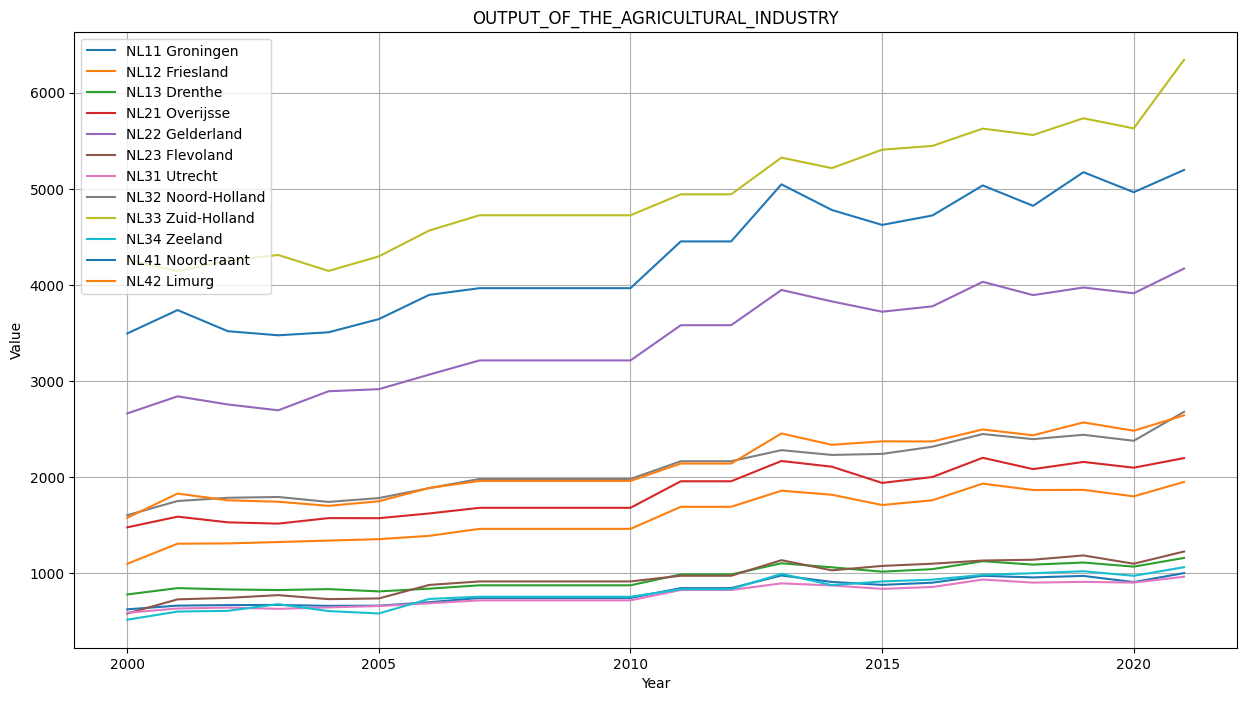

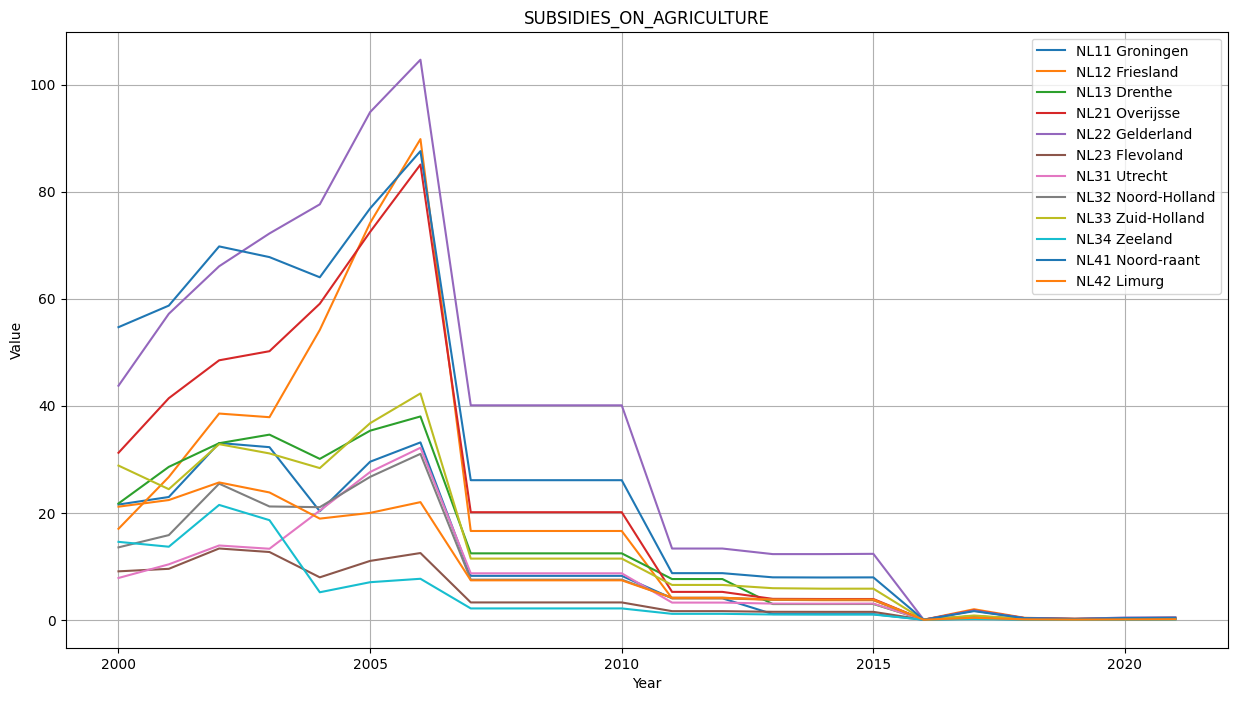

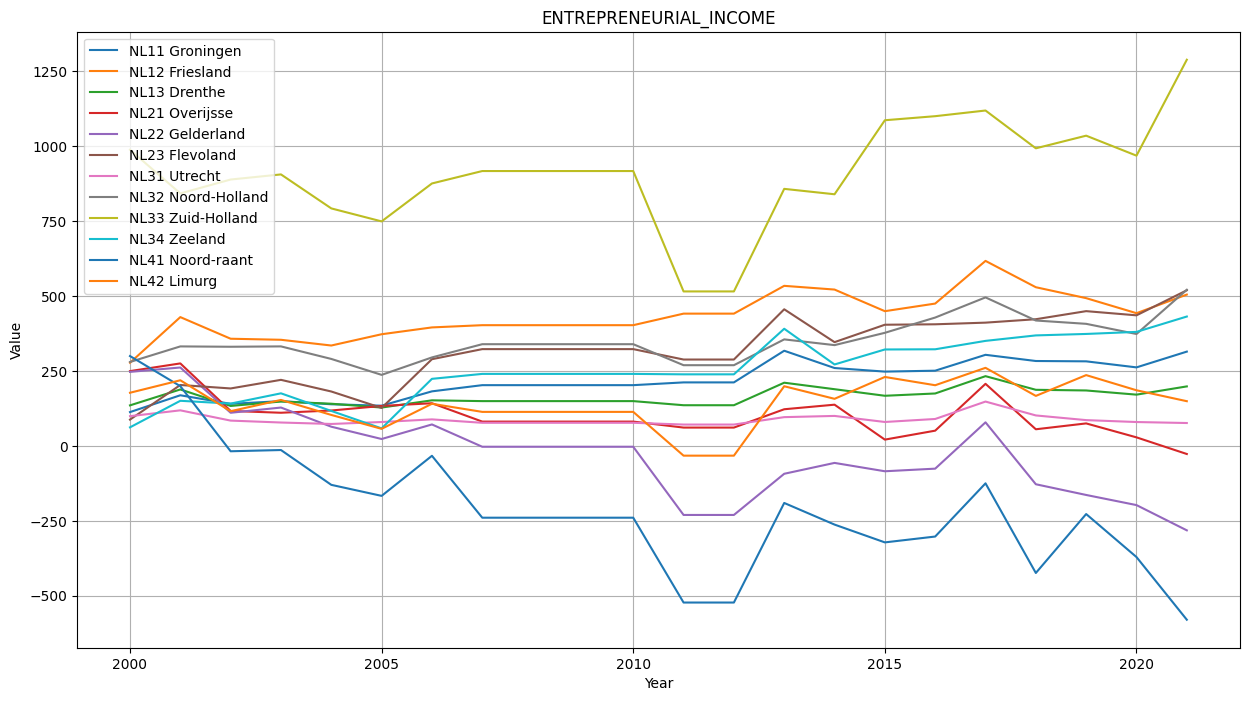

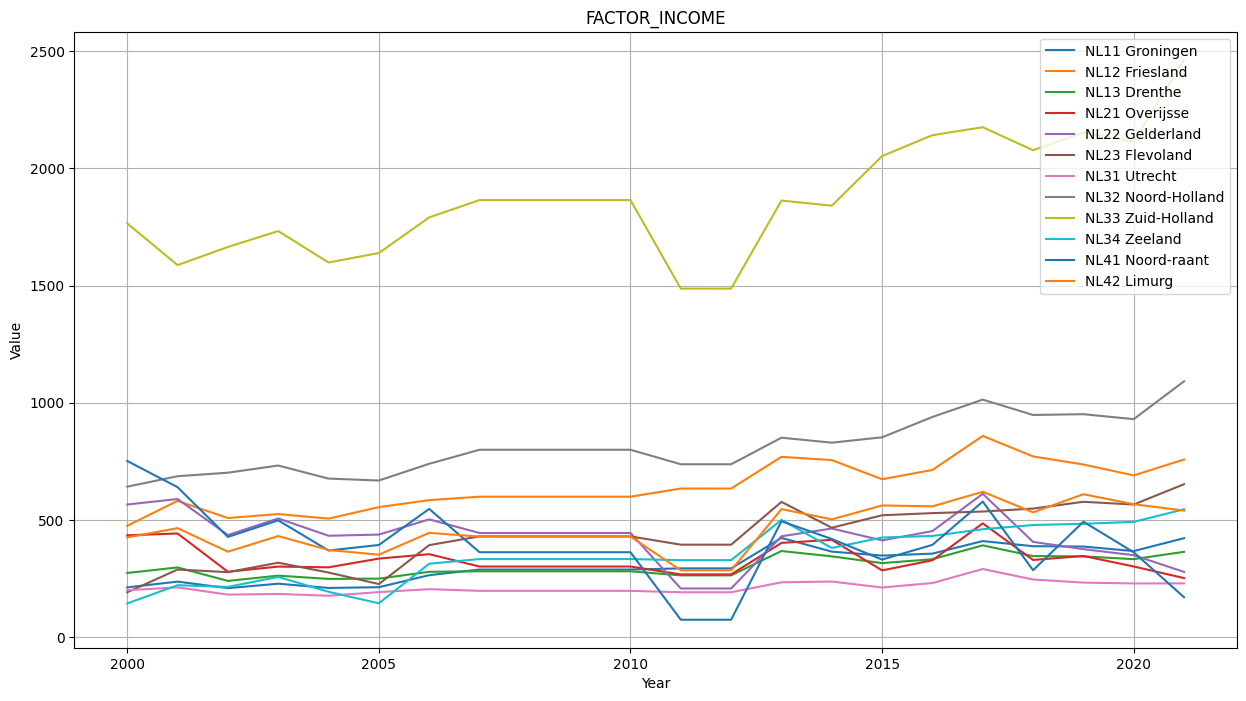

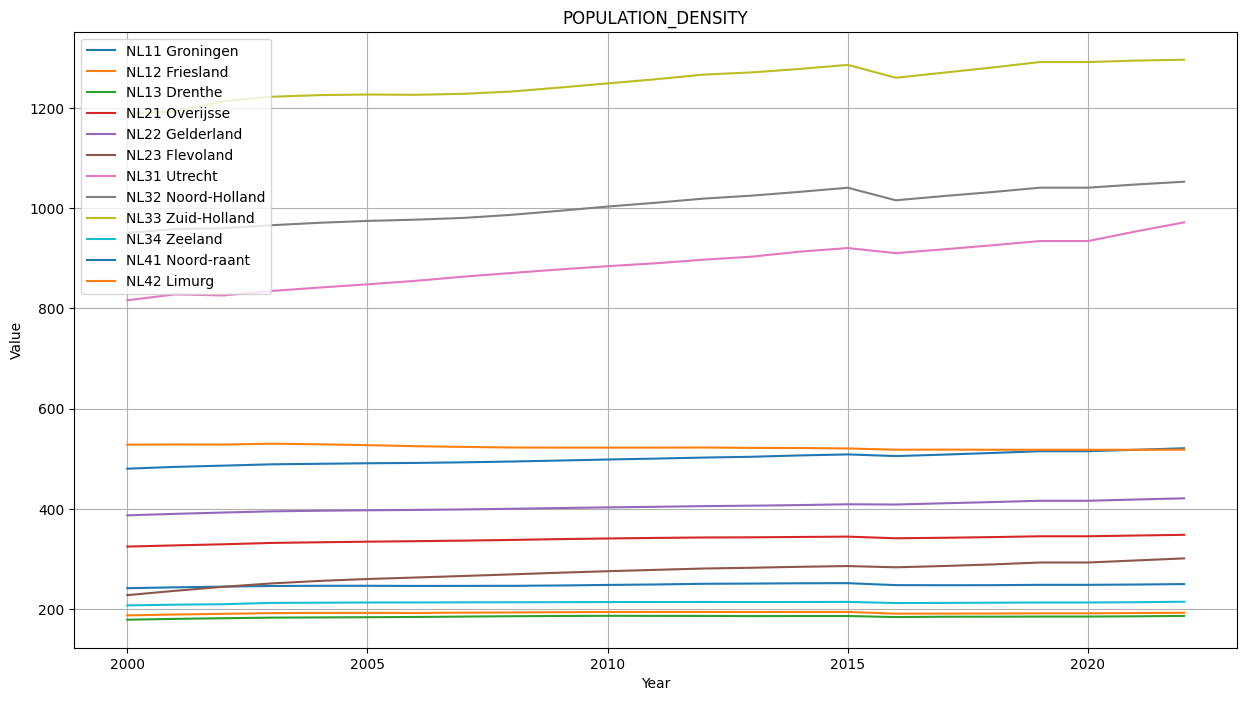

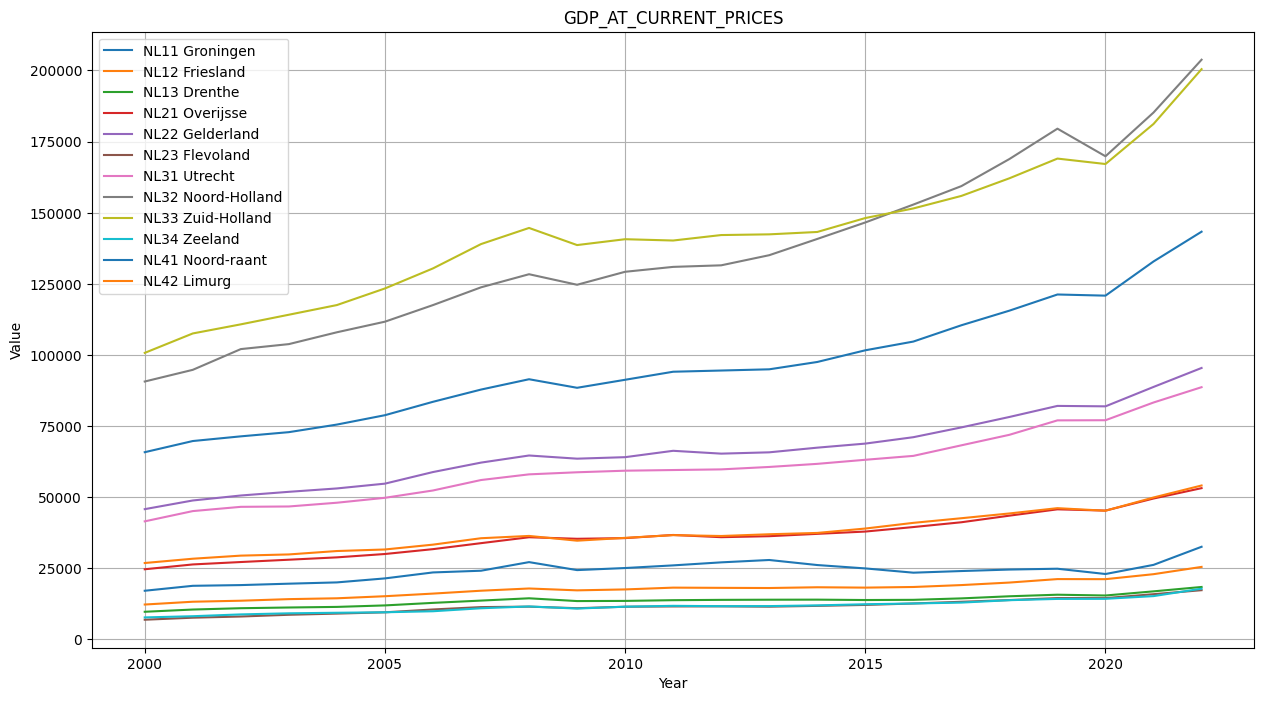

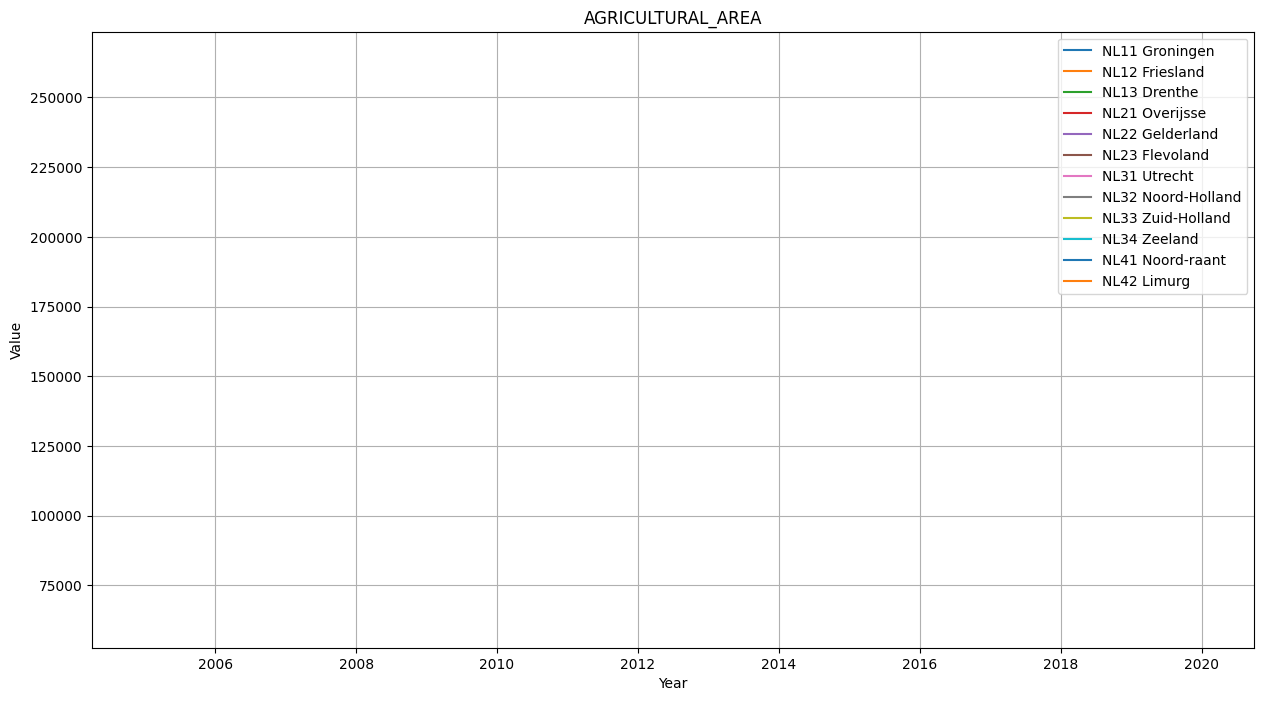

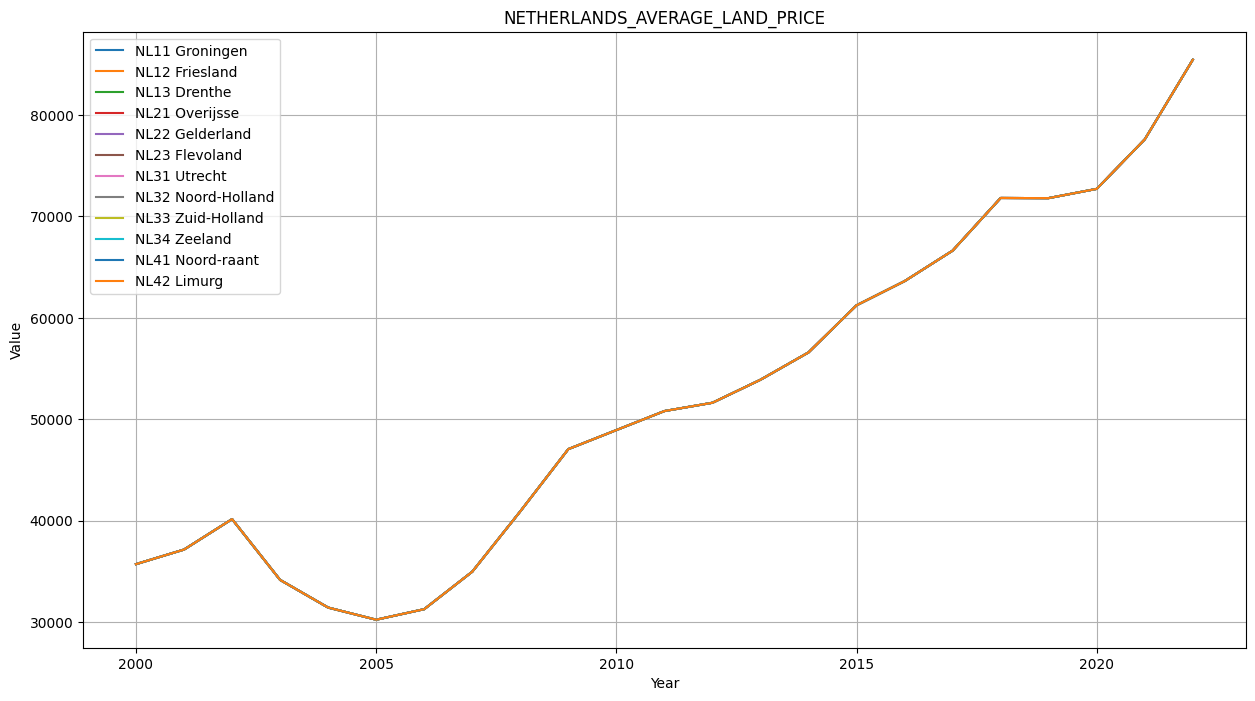

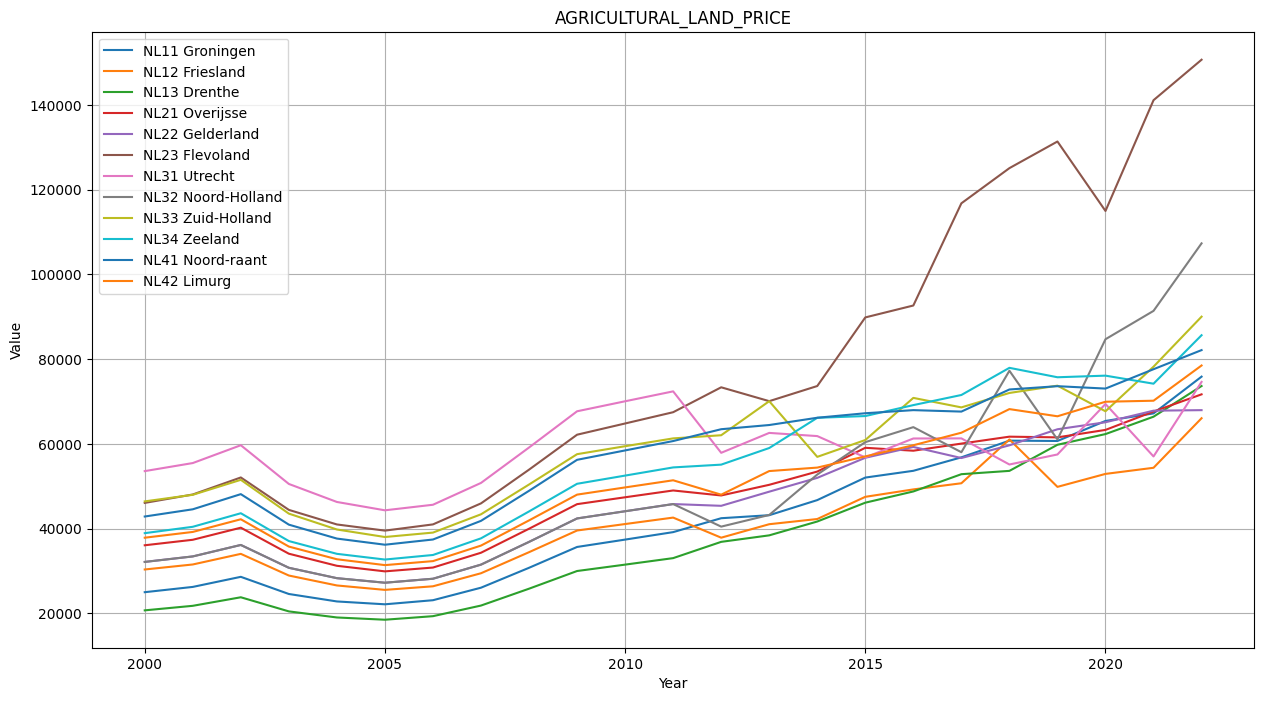

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

grouped_by_province = df.groupby("PROVINCE")

columns_to_plot = ['CROP_OUTPUT', 'ANIMAL_OUTPUT',
       'OUTPUT_OF_THE_AGRICULTURAL_INDUSTRY', 'SUBSIDIES_ON_AGRICULTURE',
       'ENTREPRENEURIAL_INCOME', 'FACTOR_INCOME', 'POPULATION_DENSITY',
       'GDP_AT_CURRENT_PRICES', 'AGRICULTURAL_AREA',
       'NETHERLANDS_AVERAGE_LAND_PRICE', 'AGRICULTURAL_LAND_PRICE']

for column in columns_to_plot:
    plt.figure(figsize=(15, 8))
    for province, data in grouped_by_province:
        plt.plot(data["YEAR"], data[column], label=province)
    plt.title(column)
    plt.xlabel("Year")
    plt.ylabel("Value")
    plt.legend()
    plt.grid(True)
    plt.show()


In [ ]:
import pandas as pd
import numpy as np
from scipy import interpolate


df['YEAR'] = pd.to_datetime(df['YEAR'], format='%Y')

grouped_by_province = df.groupby('PROVINCE')

interpolated_dfs = []
for province, data in grouped_by_province:
    data = data.drop_duplicates(subset='YEAR')

    df_interpolated = data.copy()
    for column in df.columns:
        if pd.api.types.is_numeric_dtype(data[column]):
            x = data['YEAR'].dt.year.values
            y = data[column].values
            mask = ~np.isnan(y)
            f = interpolate.interp1d(x[mask], y[mask], kind='linear', fill_value='extrapolate')
            df_interpolated[column] = f(x)

    interpolated_dfs.append(df_interpolated)

df_interpolated = pd.concat(interpolated_dfs)

df_interpolated.to_csv("interpolated_dataset_final.csv", index=False)

df_interpolated.head()

PROVINCE       YEAR  CROP_OUTPUT  ANIMAL_OUTPUT  \
0  NL11 Groningen 2000-01-01       288.34         289.67   
1  NL11 Groningen 2001-01-01       277.80         331.81   
2  NL11 Groningen 2002-01-01       282.96         321.16   
3  NL11 Groningen 2003-01-01       290.15         315.81   
4  NL11 Groningen 2004-01-01       263.75         331.45   

   OUTPUT_OF_THE_AGRICULTURAL_INDUSTRY  SUBSIDIES_ON_AGRICULTURE  \
0                               626.90                     21.52   
1                               665.52                     22.93   
2                               670.93                     33.02   
3                               672.64                     32.24   
4                               662.96                     20.26   

   ENTREPRENEURIAL_INCOME  FACTOR_INCOME  POPULATION_DENSITY  \
0                  112.50         211.08               241.2   
1                  168.64         235.74               242.9   
2                  140.02         207.88               244.3   
3                  149.01         226.82               245.6   
4                  138.60         208.63               246.0   

   GDP_AT_CURRENT_PRICES  AGRICULTURAL_AREA  NETHERLANDS_AVERAGE_LAND_PRICE  \
0               17107.64           179575.0                         35713.0   
1               18844.96           177090.0                         37150.0   
2               19099.12           174605.0                         40150.0   
3               19592.55           172120.0                         34160.0   
4               20043.47           169635.0                         31432.0   

   AGRICULTURAL_LAND_PRICE  
0              24999.00000  
1              26245.08081  
2              28623.93644  
3              24574.27405  
4              22814.91358

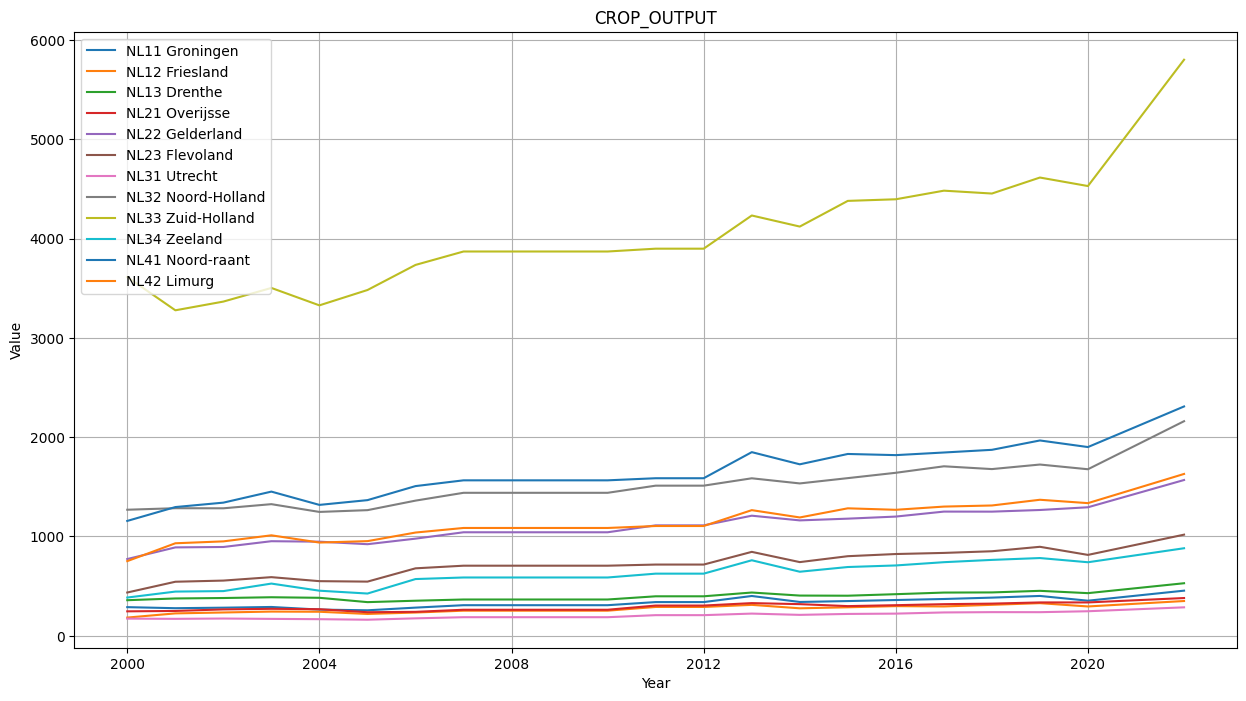

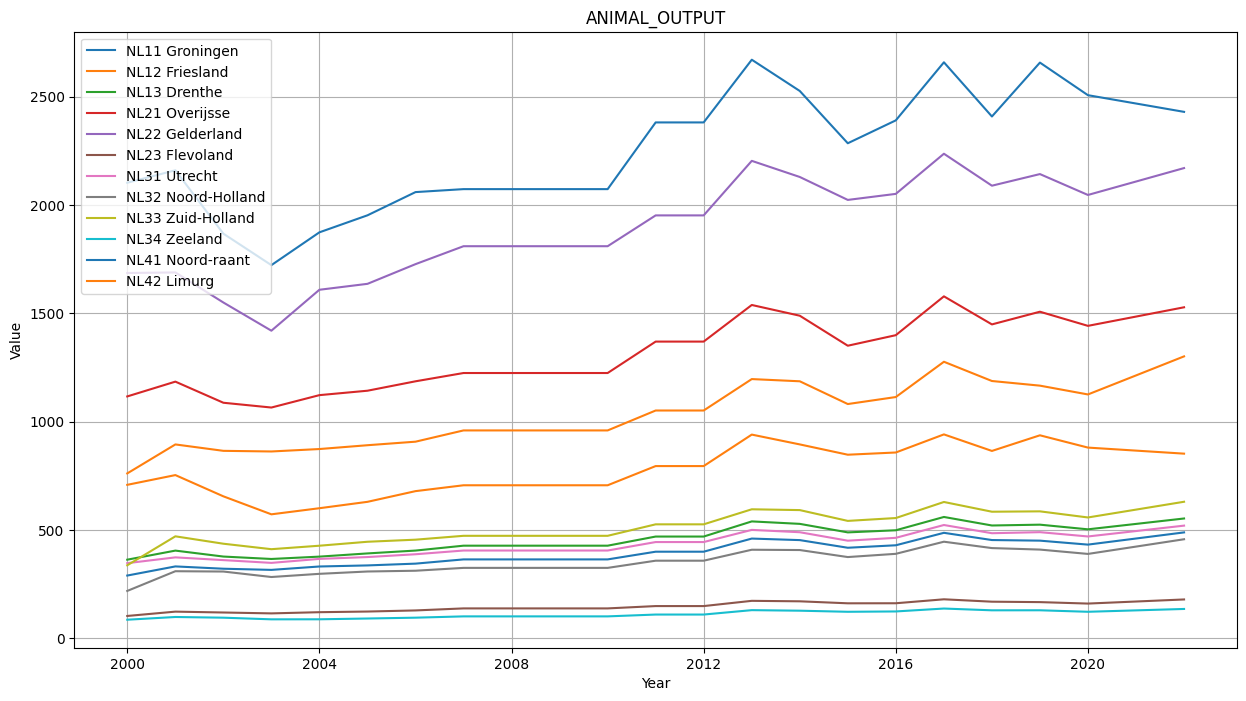

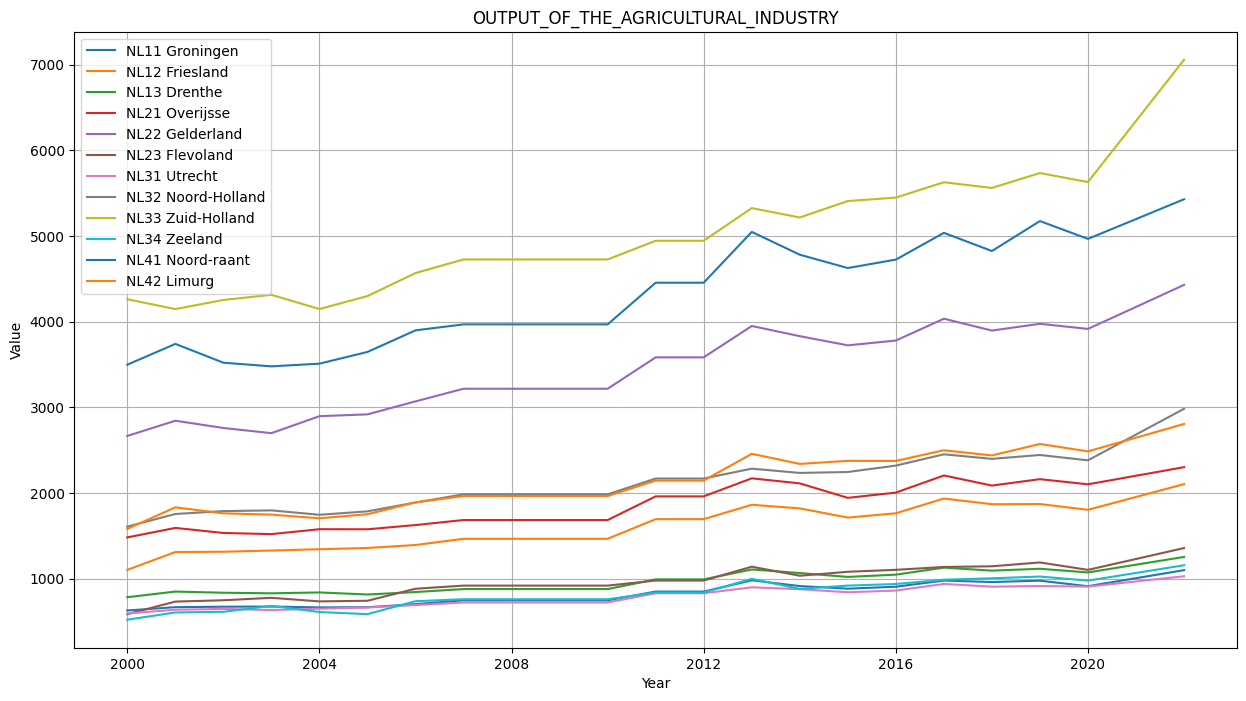

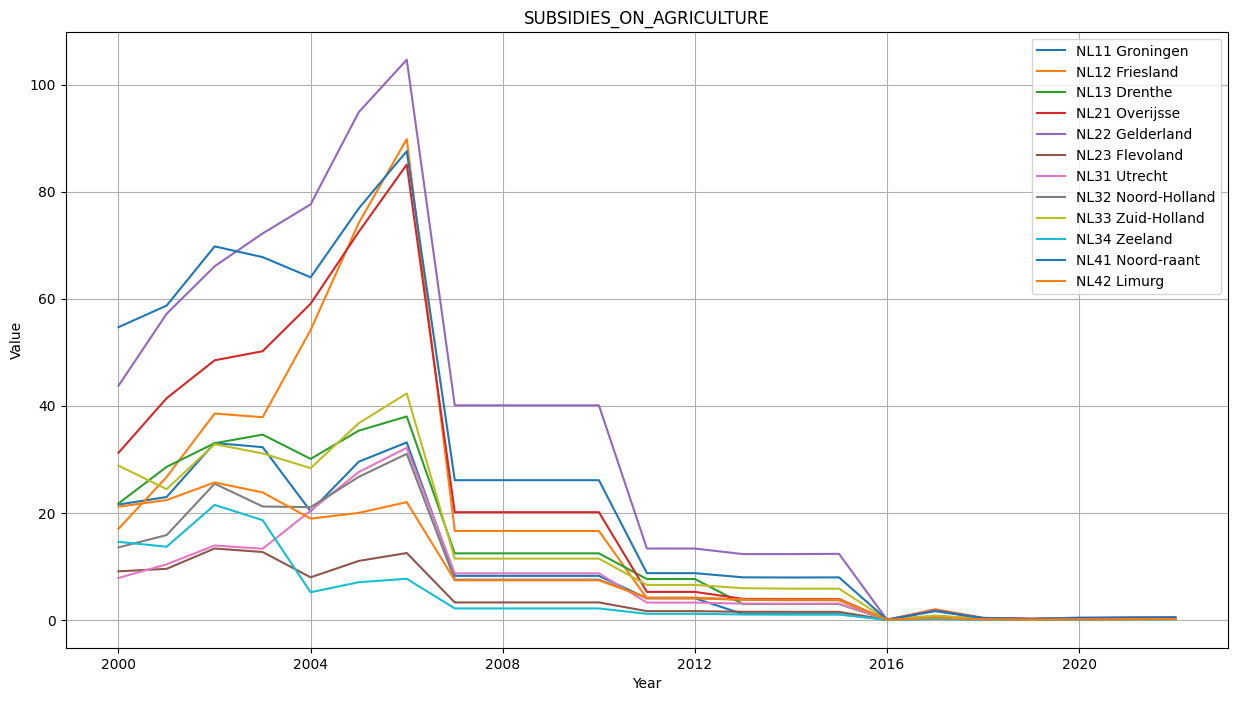

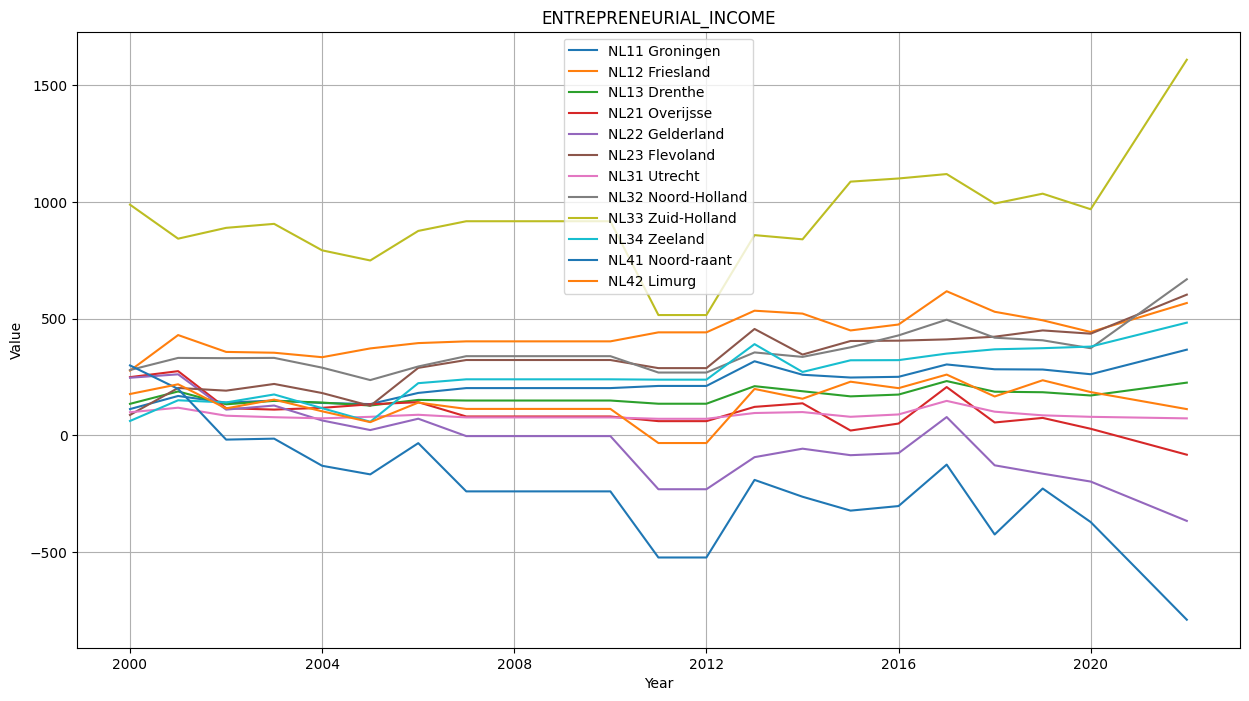

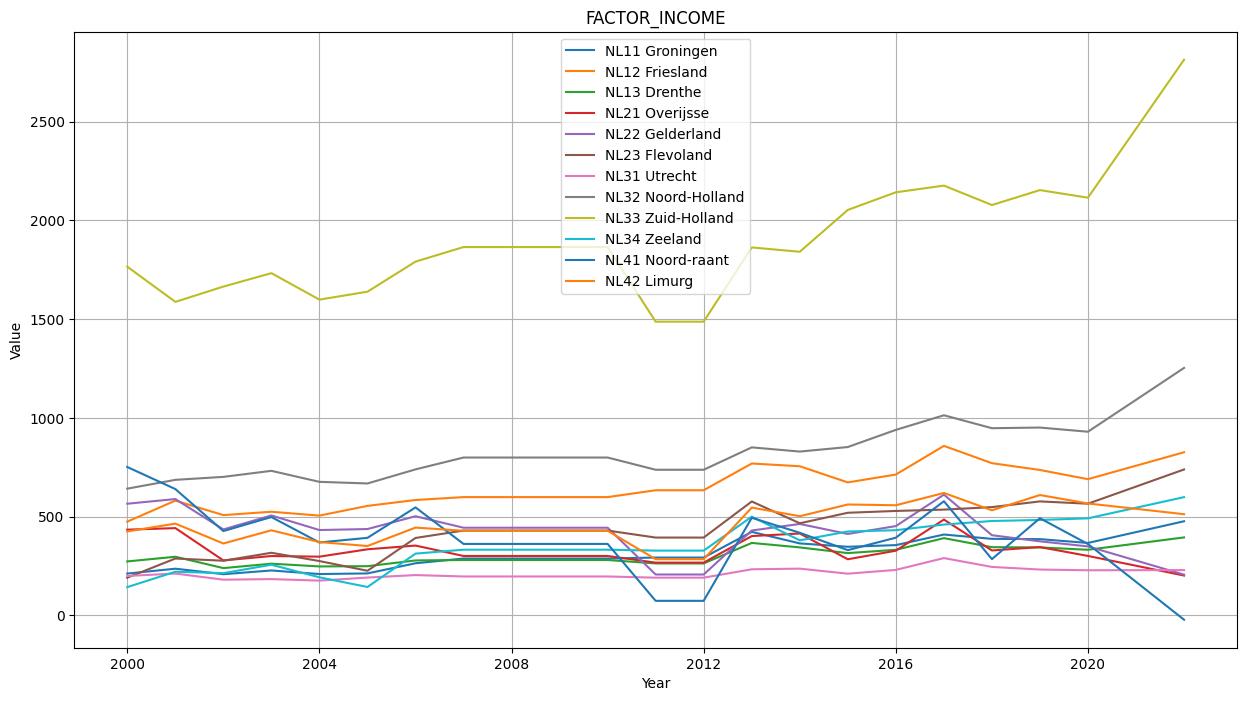

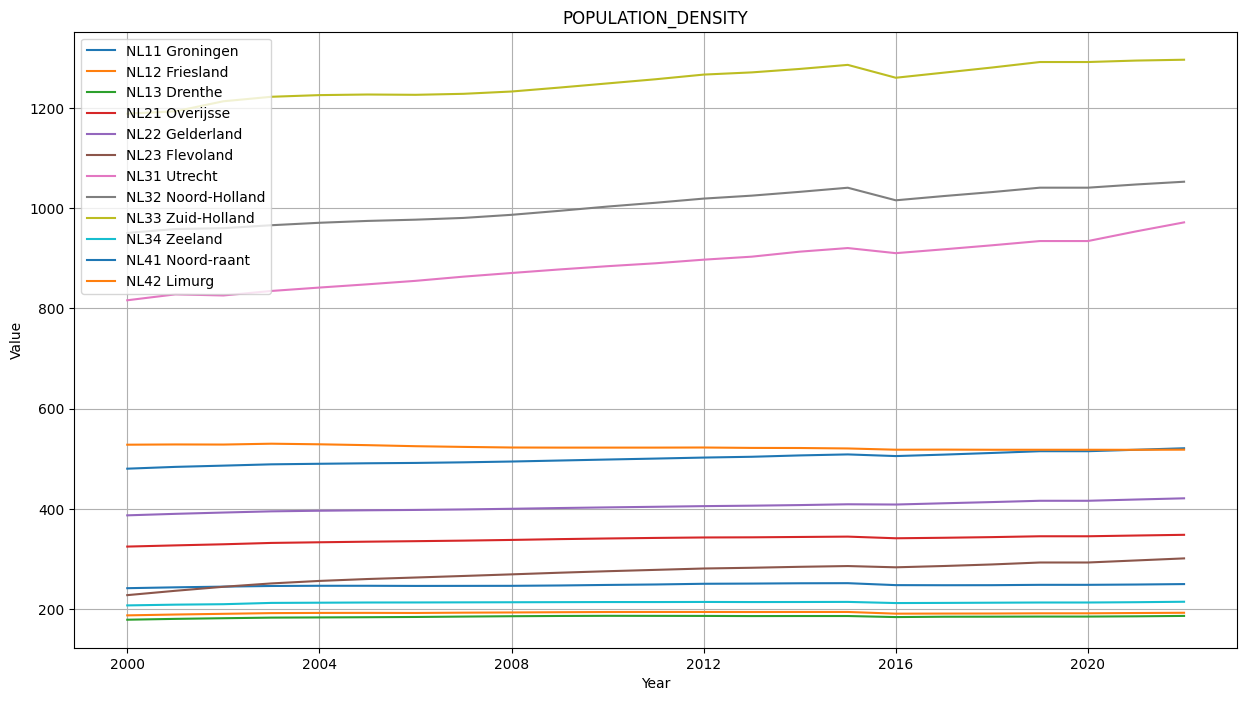

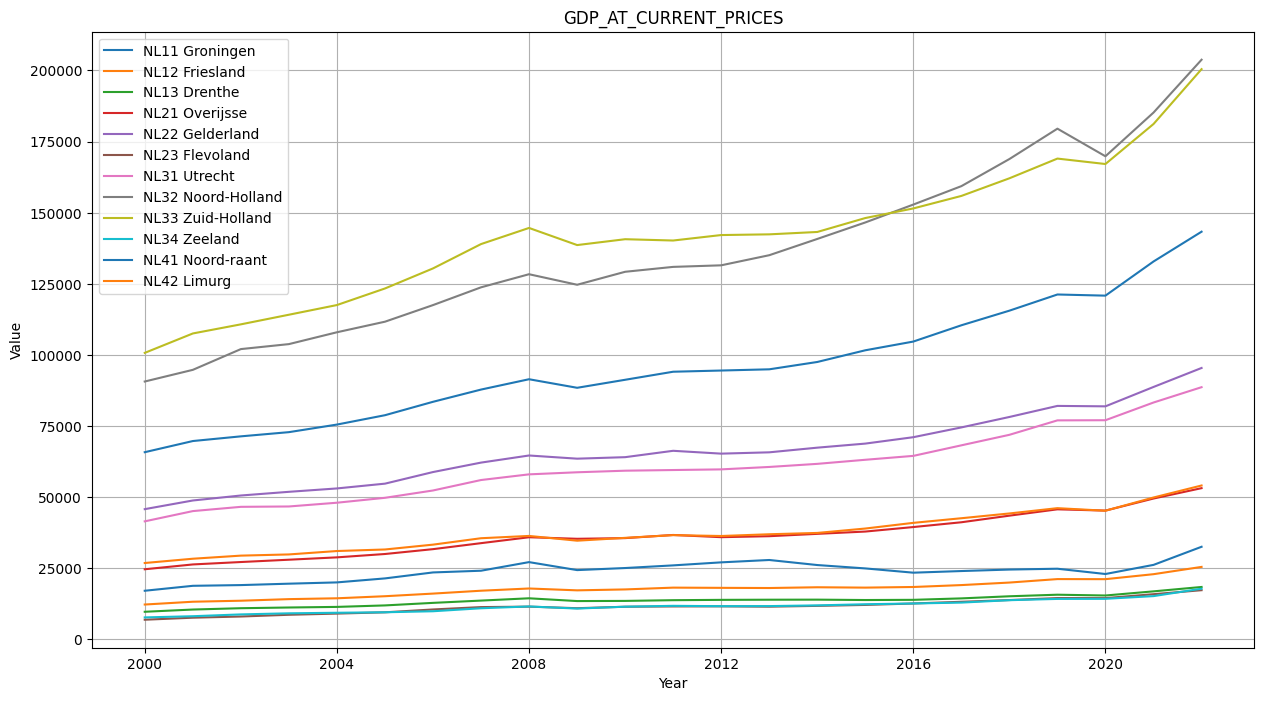

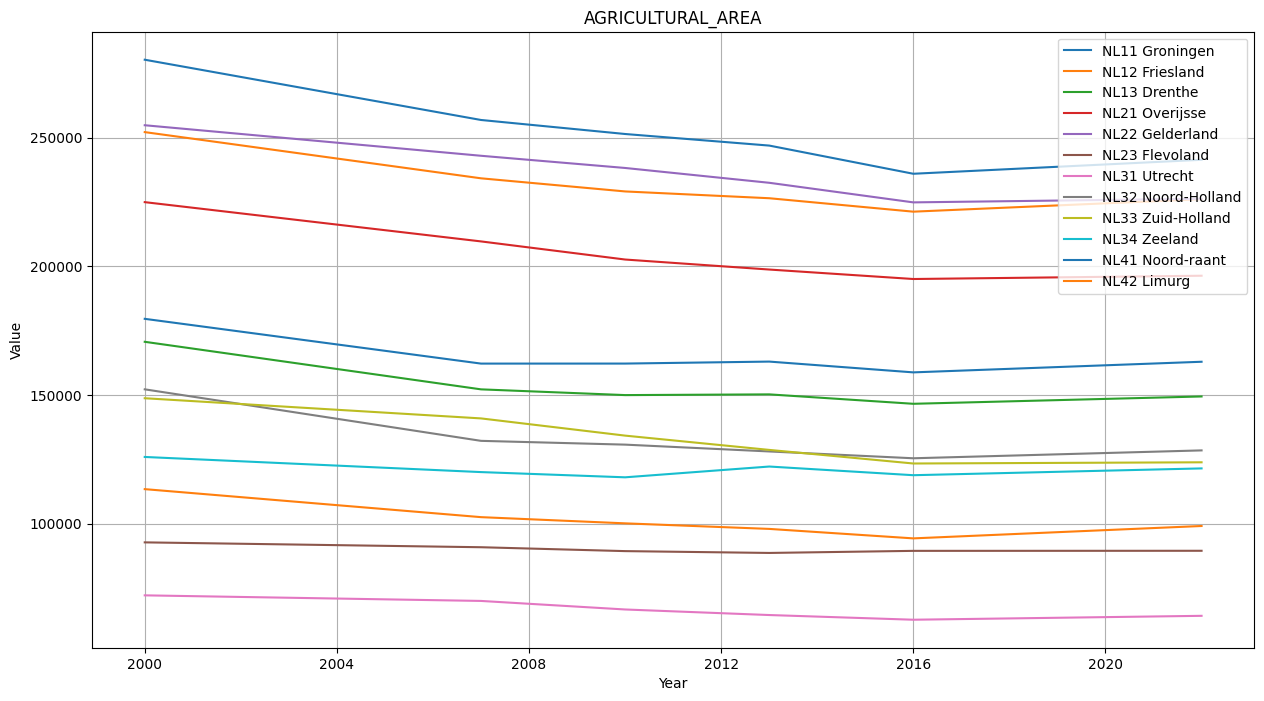

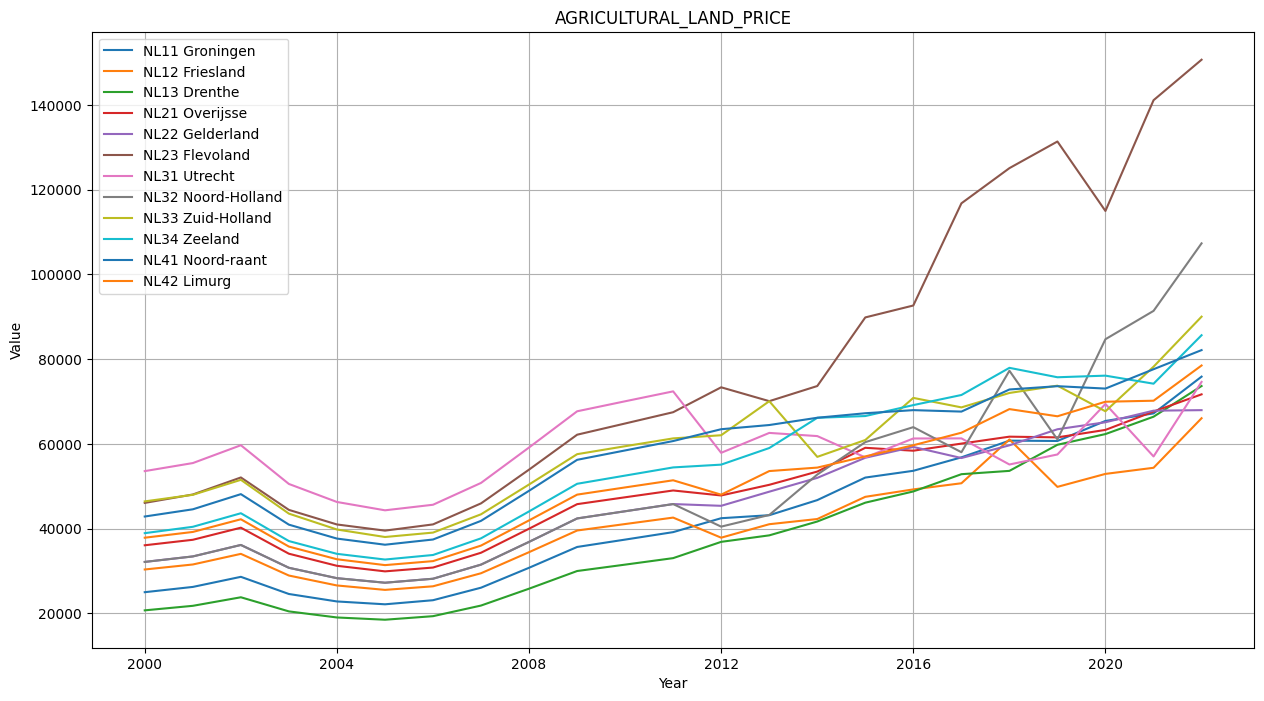

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

grouped_by_province = df_interpolated.groupby("PROVINCE")

columns_to_plot = ['CROP_OUTPUT', 'ANIMAL_OUTPUT',
       'OUTPUT_OF_THE_AGRICULTURAL_INDUSTRY', 'SUBSIDIES_ON_AGRICULTURE',
       'ENTREPRENEURIAL_INCOME', 'FACTOR_INCOME', 'POPULATION_DENSITY',
       'GDP_AT_CURRENT_PRICES', 'AGRICULTURAL_AREA',
       'AGRICULTURAL_LAND_PRICE']

for column in columns_to_plot:
    plt.figure(figsize=(15, 8))
    for province, data in grouped_by_province:
        plt.plot(data["YEAR"], data[column], label=province)
    plt.title(column)
    plt.xlabel("Year")
    plt.ylabel("Value")
    plt.legend()
    plt.grid(True)
    plt.show()


In [ ]:
# Filter the data for training (2010 to 2022) and testing (2000 to 2009)
# train_data = df[(df['YEAR'] >= 2005) & (df['YEAR'] <= 2022)]
# test_data = df[(df['YEAR'] >= 2000) & (df['YEAR']<= 2005)]

# Split the dataset into train and test sets
# X_train = train_data.drop(columns=['AGRICULTURAL_LAND_PRICE'])
# y_train = train_data['AGRICULTURAL_LAND_PRICE']
# X_test = test_data.drop(columns=['AGRICULTURAL_LAND_PRICE'])
# y_test = test_data['AGRICULTURAL_LAND_PRICE']

# Encoding categorical variables
# One-hot encode 'PROVINCE'

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

df = df_interpolated.copy()

# df['YEAR'] = pd.to_datetime(df['YEAR'])
df['YEAR'] = df['YEAR'].dt.year

df.head()

X = df.drop(columns=['AGRICULTURAL_LAND_PRICE'])
y = df['AGRICULTURAL_LAND_PRICE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



column_transformer = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), ['PROVINCE'])
    ],
    remainder='passthrough'
)

X_train_encoded = column_transformer.fit_transform(X_train)
X_test_encoded = column_transformer.transform(X_test)

rf_model2 = RandomForestRegressor(random_state=42)
rf_model2.fit(X_train_encoded, y_train)

y_pred = rf_model2.predict(X_test_encoded)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Random Forest RMSE:", rmse)

predictions_df = pd.DataFrame({
    'Province': X_test['PROVINCE'],
    'Year': X_test['YEAR'],
    'Actual_AGRICULTURAL_LAND_PRICE': y_test,
    'Predicted_AGRICULTURAL_LAND_PRICE': y_pred
})

predictions_df.head()

Random Forest RMSE: 5357.6793746275525


Province  Year  Actual_AGRICULTURAL_LAND_PRICE  \
30     NL12 Friesland   2007                     29470.08907   
124     NL23 Flevoland  2009                     62161.88563   
196  NL33 Zuid-Holland  2012                     62033.00000   
127     NL23 Flevoland  2012                     73346.00002   
216       NL34 Zeeland  2009                     50579.26551   

     Predicted_AGRICULTURAL_LAND_PRICE  
30                        31826.229193  
124                       57934.478343  
196                       61183.482562  
127                       70425.526525  
216                       48115.082041

In [ ]:
X_all_encoded = column_transformer.transform(X)


all_rf_y = rf_model2.predict(X_all_encoded)

all_rf_pred_df = pd.DataFrame({
    'Province': X['PROVINCE'],
    'Year': X['YEAR'],
    'Actual_AGRICULTURAL_LAND_PRICE': y,
    'Predicted_AGRICULTURAL_LAND_PRICE': all_rf_y
})

all_rf_pred_df.head()

Province  Year  Actual_AGRICULTURAL_LAND_PRICE  \
0  NL11 Groningen  2000                     24999.00000   
1  NL11 Groningen  2001                     26245.08081   
2  NL11 Groningen  2002                     28623.93644   
3  NL11 Groningen  2003                     24574.27405   
4  NL11 Groningen  2004                     22814.91358   

   Predicted_AGRICULTURAL_LAND_PRICE  
0                       25849.175757  
1                       26497.190695  
2                       29047.583550  
3                       24778.632697  
4                       24084.477975

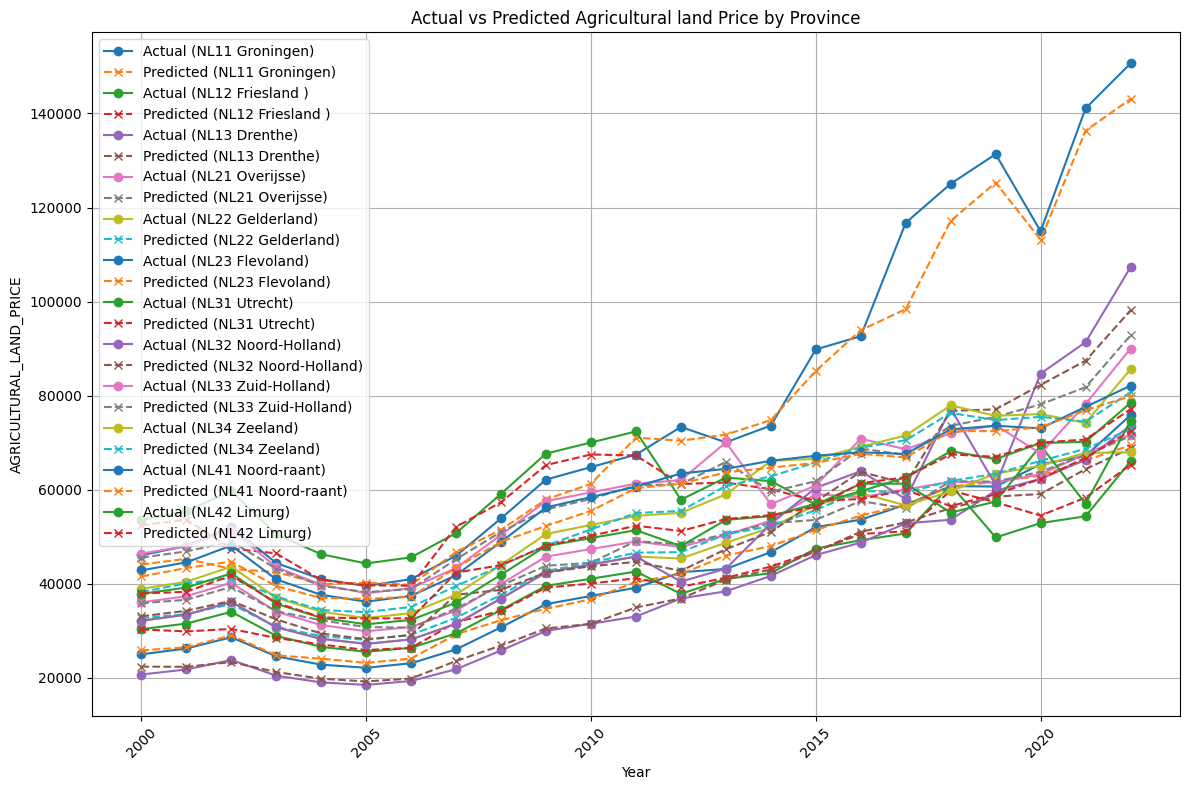

In [ ]:
import matplotlib.pyplot as plt


grouped_df = all_rf_pred_df.groupby('Province')

plt.figure(figsize=(12, 8))

for province, data in grouped_df:
    plt.plot(data['Year'], data['Actual_AGRICULTURAL_LAND_PRICE'], label=f'Actual ({province})', marker='o')
    plt.plot(data['Year'], data['Predicted_AGRICULTURAL_LAND_PRICE'], label=f'Predicted ({province})', linestyle='--', marker='x')

plt.xlabel('Year')
plt.ylabel('AGRICULTURAL_LAND_PRICE')
plt.title('Actual vs Predicted Agricultural land Price by Province')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


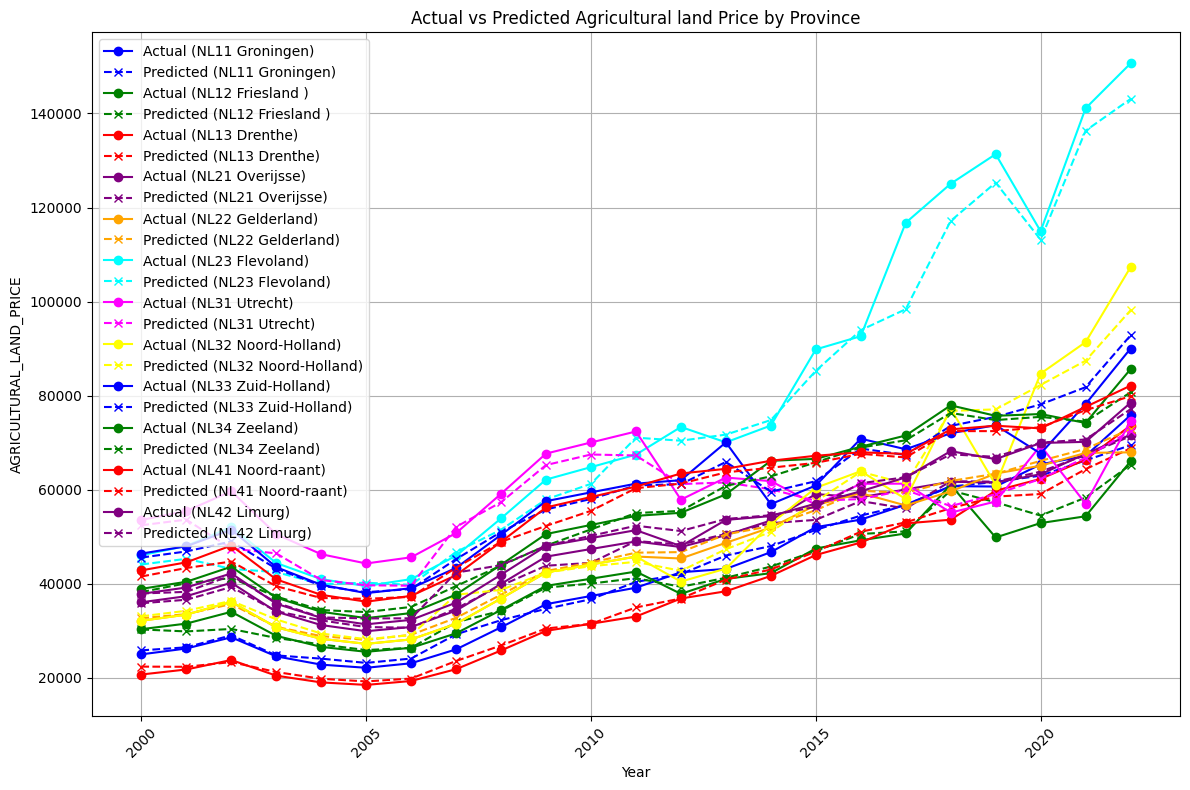

In [ ]:
import matplotlib.pyplot as plt


grouped_df = all_rf_pred_df.groupby('Province')

colors = ['blue', 'green', 'red', 'purple', 'orange', 'cyan', 'magenta', 'yellow']

plt.figure(figsize=(12, 8))

for i, (province, data) in enumerate(grouped_df):
    color = colors[i % len(colors)]
    plt.plot(data['Year'], data['Actual_AGRICULTURAL_LAND_PRICE'], label=f'Actual ({province})', marker='o', color=color)
    plt.plot(data['Year'], data['Predicted_AGRICULTURAL_LAND_PRICE'], label=f'Predicted ({province})', linestyle='--', marker='x', color=color)

plt.xlabel('Year')
plt.ylabel('AGRICULTURAL_LAND_PRICE')
plt.title('Actual vs Predicted Agricultural land Price by Province')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (12,) and arg 1 with shape (23,).

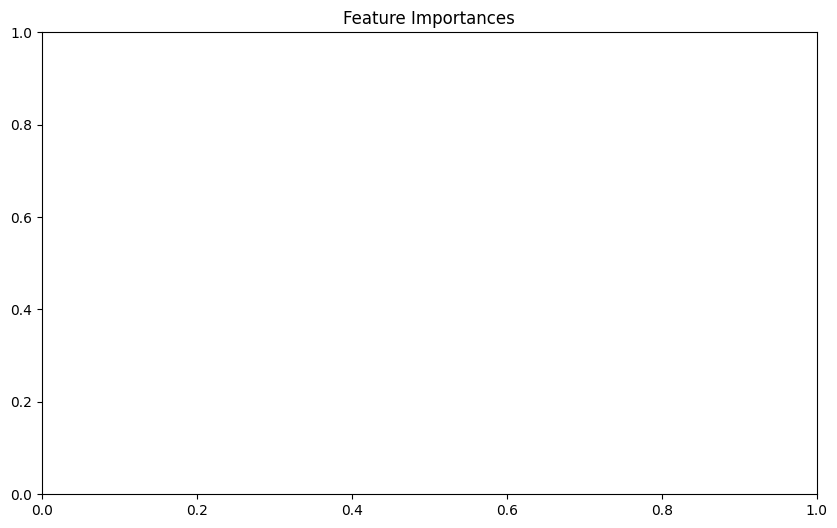

In [ ]:
importances = rf_model2.feature_importances_

# Sort indices of features by importance
indices = np.argsort(importances)[::-1]

# Get feature names
feature_names = X_train.columns

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], color="b", align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation='vertical')  # Using feature names for x-axis ticks
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()


In [ ]:
df = df_interpolated.copy()
df.head()

PROVINCE       YEAR  CROP_OUTPUT  ANIMAL_OUTPUT  \
0  NL11 Groningen 2000-01-01       288.34         289.67   
1  NL11 Groningen 2001-01-01       277.80         331.81   
2  NL11 Groningen 2002-01-01       282.96         321.16   
3  NL11 Groningen 2003-01-01       290.15         315.81   
4  NL11 Groningen 2004-01-01       263.75         331.45   

   OUTPUT_OF_THE_AGRICULTURAL_INDUSTRY  SUBSIDIES_ON_AGRICULTURE  \
0                               626.90                     21.52   
1                               665.52                     22.93   
2                               670.93                     33.02   
3                               672.64                     32.24   
4                               662.96                     20.26   

   ENTREPRENEURIAL_INCOME  FACTOR_INCOME  POPULATION_DENSITY  \
0                  112.50         211.08               241.2   
1                  168.64         235.74               242.9   
2                  140.02         207.88               244.3   
3                  149.01         226.82               245.6   
4                  138.60         208.63               246.0   

   GDP_AT_CURRENT_PRICES  AGRICULTURAL_AREA  NETHERLANDS_AVERAGE_LAND_PRICE  \
0               17107.64           179575.0                         35713.0   
1               18844.96           177090.0                         37150.0   
2               19099.12           174605.0                         40150.0   
3               19592.55           172120.0                         34160.0   
4               20043.47           169635.0                         31432.0   

   AGRICULTURAL_LAND_PRICE  
0              24999.00000  
1              26245.08081  
2              28623.93644  
3              24574.27405  
4              22814.91358

/home/shash/miniconda3/envs/tf/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/shash/miniconda3/envs/tf/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/shash/miniconda3/envs/tf/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/shash/miniconda3/envs/tf/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/shash/miniconda3/envs/tf/lib/python3.9/site-packages/statsmodels

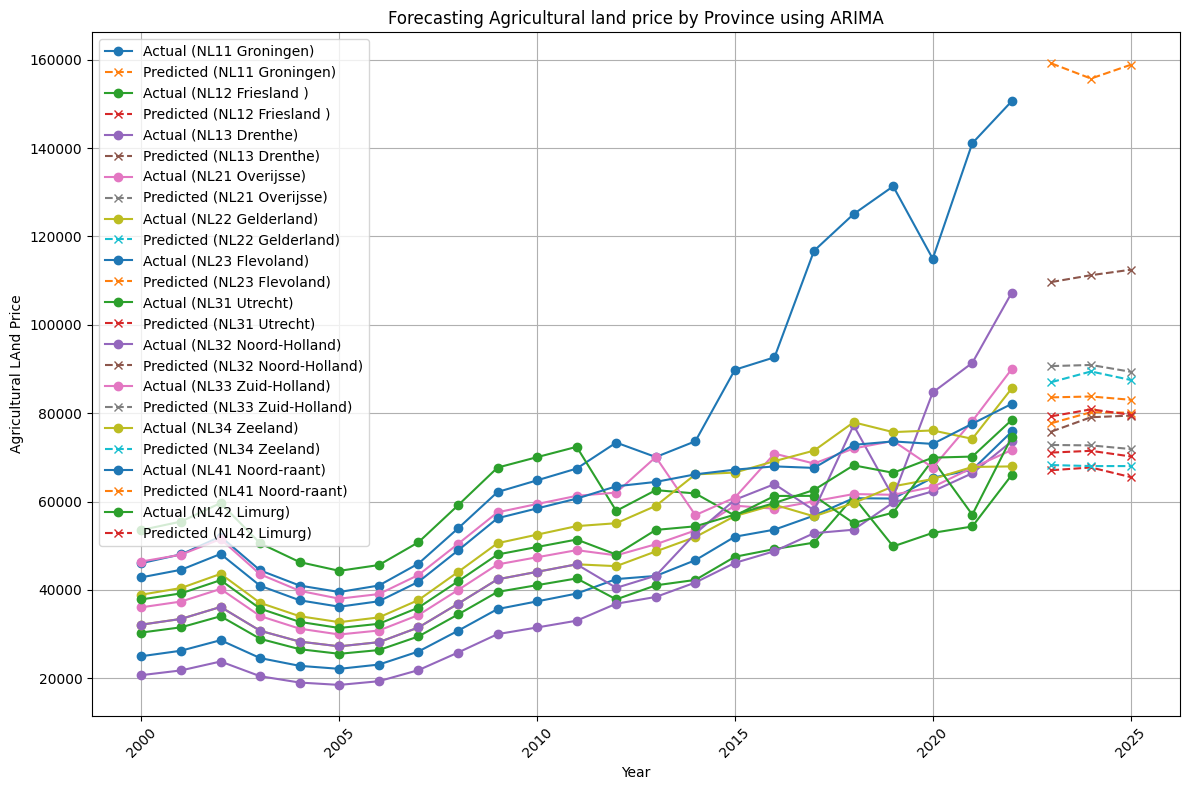

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA


grouped_df = df.groupby('PROVINCE')

# Define a function to apply ARIMA model to each group
def apply_arima(group):
    model = ARIMA(group['AGRICULTURAL_LAND_PRICE'], order=(5,1,0))
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=3)  # Adjust the number of steps as needed
    return forecast

# Iterate over each group (province) and apply ARIMA model
predicted_values = {}
for province, group in grouped_df:
    predicted_values[province] = apply_arima(group)

# Visualize the actual and predicted values
plt.figure(figsize=(12, 8))

for province, forecast in predicted_values.items():
    plt.plot(grouped_df.get_group(province)['YEAR'].dt.year, grouped_df.get_group(province)['AGRICULTURAL_LAND_PRICE'], label=f'Actual ({province})', marker='o')
    plt.plot(range(df['YEAR'].max().year+1, df['YEAR'].max().year+4), forecast, label=f'Predicted ({province})', linestyle='--', marker='x')

plt.xlabel('Year')
plt.ylabel('Agricultural LAnd Price')
plt.title('Forecasting Agricultural land price by Province using ARIMA')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/home/shash/miniconda3/envs/tf/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/shash/miniconda3/envs/tf/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/shash/miniconda3/envs/tf/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/shash/miniconda3/envs/tf/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/shash/miniconda3/envs/tf/lib/python3.9/site-packages/statsmodels

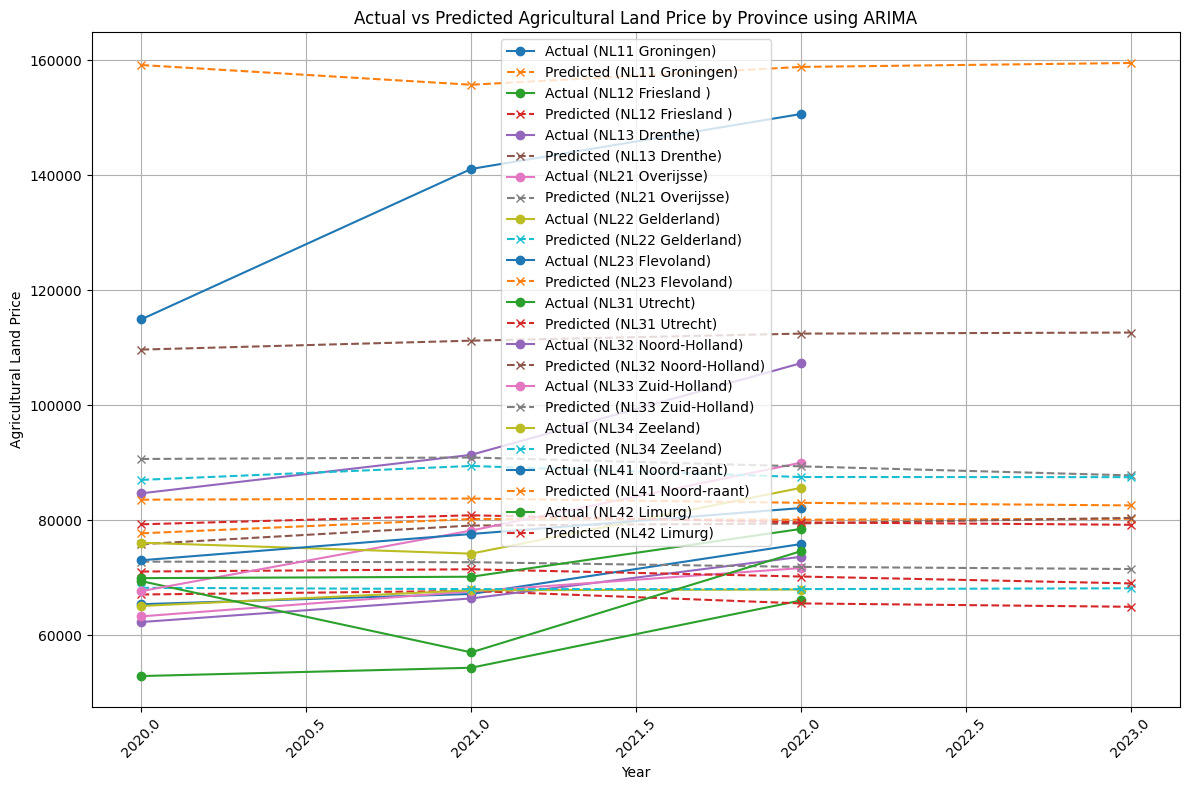

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt


# Specify the years for training and testing
train_years = [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
test_years = [2020, 2021, 2022, 2023]   # Years for testing

# Filter the dataset for training and testing
train_data = df[df['YEAR'].dt.year.isin(train_years)]
test_data = df[df['YEAR'].dt.year.isin(test_years)]

# Group the training dataset by province
grouped_train_data = train_data.groupby('PROVINCE')

# Define a function to apply ARIMA model to each group
def apply_arima(group):
    model = ARIMA(group['AGRICULTURAL_LAND_PRICE'], order=(5,1,0))
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=len(test_years))
    return forecast

# Train ARIMA models for each province
predicted_values = {}
for province, group in grouped_train_data:
    predicted_values[province] = apply_arima(group)

# Visualize the actual and predicted values for testing years
plt.figure(figsize=(12, 8))

for province, group in test_data.groupby('PROVINCE'):
    plt.plot(group['YEAR'].dt.year, group['AGRICULTURAL_LAND_PRICE'], label=f'Actual ({province})', marker='o')
    plt.plot(test_years, predicted_values[province], label=f'Predicted ({province})', linestyle='--', marker='x')

plt.xlabel('Year')
plt.ylabel('Agricultural Land Price')
plt.title('Actual vs Predicted Agricultural Land Price by Province using ARIMA')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import statsmodels.api as sm


# Define the independent variables
independent_vars = ['CROP_OUTPUT', 'ANIMAL_OUTPUT',
       'OUTPUT_OF_THE_AGRICULTURAL_INDUSTRY', 'SUBSIDIES_ON_AGRICULTURE',
       'ENTREPRENEURIAL_INCOME', 'FACTOR_INCOME', 'POPULATION_DENSITY',
       'GDP_AT_CURRENT_PRICES', 'AGRICULTURAL_AREA',
       'NETHERLANDS_AVERAGE_LAND_PRICE']

df['const'] = 1

df['AGRICULTURAL_LAND_PRICE'] = pd.to_numeric(df['AGRICULTURAL_LAND_PRICE'])

# Define the fixed effects (province)
fixed_effects = df['PROVINCE']


# Define the dependent variable
dependent_var = df['AGRICULTURAL_LAND_PRICE']

# Define the model
model = sm.OLS(dependent_var, df[independent_vars + ['const']])

# Fit the model
fixed_effects_results = model.fit()

print(fixed_effects_results.summary())

                               OLS Regression Results                              
Dep. Variable:     AGRICULTURAL_LAND_PRICE   R-squared:                       0.734
Model:                                 OLS   Adj. R-squared:                  0.723
Method:                      Least Squares   F-statistic:                     72.95
Date:                     Mon, 18 Mar 2024   Prob (F-statistic):           3.19e-70
Time:                             02:14:21   Log-Likelihood:                -2944.5
No. Observations:                      276   AIC:                             5911.
Df Residuals:                          265   BIC:                             5951.
Df Model:                               10                                         
Covariance Type:                 nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

In [ ]:
import pandas as pd
from linearmodels.panel import RandomEffects

df = df_interpolated.copy()
df.head()

# Define the independent variables
independent_vars = ['CROP_OUTPUT', 'ANIMAL_OUTPUT',
       'OUTPUT_OF_THE_AGRICULTURAL_INDUSTRY', 'SUBSIDIES_ON_AGRICULTURE',
       'ENTREPRENEURIAL_INCOME', 'FACTOR_INCOME', 'POPULATION_DENSITY',
       'GDP_AT_CURRENT_PRICES', 'AGRICULTURAL_AREA',
       'NETHERLANDS_AVERAGE_LAND_PRICE']

df.set_index(['PROVINCE', 'YEAR'], inplace=True)

# Add constant to the independent variables
df['const'] = 1

# Convert 'AGRICULTURAL_LAND_PRICE' to numeric
df['AGRICULTURAL_LAND_PRICE'] = pd.to_numeric(df['AGRICULTURAL_LAND_PRICE'], errors='coerce')


# Define the dependent variable
dependent_var = df['AGRICULTURAL_LAND_PRICE']

# Define the model (Random Effects)
model = RandomEffects(dependent_var, df[independent_vars + ['const']])

# Fit the model
random_effects_results = model.fit()

print(random_effects_results)


                           RandomEffects Estimation Summary                          
Dep. Variable:     AGRICULTURAL_LAND_PRICE   R-squared:                        0.8133
Estimator:                   RandomEffects   R-squared (Between):              0.1190
No. Observations:                      276   R-squared (Within):               0.8172
Date:                     Mon, Mar 18 2024   R-squared (Overall):              0.6346
Time:                             02:18:34   Log-likelihood                   -2854.3
Cov. Estimator:                 Unadjusted                                           
                                             F-statistic:                      115.43
Entities:                               12   P-value                           0.0000
Avg Obs:                            23.000   Distribution:                  F(10,265)
Min Obs:                            23.000                                           
Max Obs:                            23.000   F-statist

In [ ]:
df = df_interpolated.copy()
df.head()

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, HuberRegressor, SGDRegressor, BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.isotonic import IsotonicRegression

def train_and_predict(model_type, X_train, y_train, X_test):
    if model_type == 'RandomForest':
        # Train a Random Forest Regressor model
        model = RandomForestRegressor(random_state=42)
    elif model_type == 'GradientBoosting':
        # Train a Gradient Boosting Regressor model
        model = GradientBoostingRegressor(random_state=42)
    elif model_type == 'AdaBoost':
        # Train an AdaBoost Regressor model
        model = AdaBoostRegressor(random_state=42)
    elif model_type == 'DecisionTree':
        # Train a Decision Tree Regressor model
        model = DecisionTreeRegressor(random_state=42)
    elif model_type == 'LinearRegression':
        # Train a Linear Regression model
        model = LinearRegression()
    elif model_type == 'Ridge':
        # Train a Ridge Regression model
        model = Ridge(random_state=42)
    elif model_type == 'Lasso':
        # Train a Lasso Regression model
        model = Lasso(random_state=42)
    elif model_type == 'ElasticNet':
        # Train an ElasticNet Regression model
        model = ElasticNet(random_state=42)
    elif model_type == 'Huber':
        # Train a Huber Regressor model
        model = HuberRegressor()
    elif model_type == 'SGD':
        # Train an SGD Regressor model
        model = SGDRegressor(random_state=42)
    elif model_type == 'BayesianRidge':
        # Train a Bayesian Ridge Regression model
        model = BayesianRidge()
    elif model_type == 'KNN':
        # Train a K-Nearest Neighbors (KNN) Regressor model
        model = KNeighborsRegressor()
    elif model_type == 'SVR':
        # Train a Support Vector Machine (SVM) Regressor model
        model = SVR()
    elif model_type == 'XGBoost':
        # Train an XGBoost Regressor model
        model = XGBRegressor(random_state=42)
    elif model_type == 'GaussianProcess':
        # Train a Gaussian Process Regressor model
        model = GaussianProcessRegressor(random_state=42)
    else:
        raise ValueError("Invalid model type.")

    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    return model, y_pred

def main():
    df = df_interpolated.copy()

    # df['YEAR'] = pd.to_datetime(df['YEAR'])
    df['YEAR'] = df['YEAR'].dt.year

    X = df.drop(columns=['AGRICULTURAL_LAND_PRICE'])
    y = df['AGRICULTURAL_LAND_PRICE']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    column_transformer = ColumnTransformer(
        transformers=[
            ('onehot', OneHotEncoder(), ['PROVINCE'])
        ],
        remainder='passthrough'
    )

    X_train_encoded = column_transformer.fit_transform(X_train)
    X_test_encoded = column_transformer.transform(X_test)

    # List of models to train
    models_to_train = ['RandomForest', 'GradientBoosting', 'AdaBoost',
                       'DecisionTree', 'LinearRegression', 'Ridge',
                       'Lasso', 'ElasticNet', 'Huber', 'SGD',
                       'BayesianRidge', 'KNN', 'SVR', 'XGBoost',
                       'GaussianProcess']

    for model_type in models_to_train:
        # Train and predict using the specified model
        model, y_pred = train_and_predict(model_type, X_train_encoded, y_train, X_test_encoded)

        # Calculate RMSE (Root Mean Squared Error) of the model
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        print(f"{model_type} RMSE:", rmse)

        # Create a DataFrame for predictions and actual values
        predictions_df = pd.DataFrame({
            'Province': X_test['PROVINCE'],
            'Year': X_test['YEAR'],
            'Actual_AGRICULTURAL_LAND_PRICE': y_test,
            'Predicted_AGRICULTURAL_LAND_PRICE': y_pred
        })

        # Display the new DataFrame
        predictions_df.head()

if __name__ == "__main__":
    main()


RandomForest RMSE: 5357.6793746275525
GradientBoosting RMSE: 5466.834776047566
AdaBoost RMSE: 6852.0055589931335
DecisionTree RMSE: 7868.166834311981
LinearRegression RMSE: 8037.426756739038
Ridge RMSE: 7864.729801723027
Lasso RMSE: 8037.373783139531
ElasticNet RMSE: 10560.378295314493
Huber RMSE: 11311.007460239487
SGD RMSE: 4.3527965894562505e+19
BayesianRidge RMSE: 11163.441359866127
KNN RMSE: 5860.094780304415
SVR RMSE: 17626.506514468078
XGBoost RMSE: 4013.2434207275455
GaussianProcess RMSE: 55051.70052769844


/home/shash/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.786e+09, tolerance: 9.512e+06
  model = cd_fast.enet_coordinate_descent(
/home/shash/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.114e+10, tolerance: 9.512e+06
  model = cd_fast.enet_coordinate_descent(
/home/shash/miniconda3/envs/tf/lib/python3.9/site-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as 